# What is the most optimal skill to learn for data analysts?

### Methodology
1. Group skills to determine median salary and likelyhood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevelent

In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vikra\Desktop\Data analyst Luke\python\3_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_India = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

In [4]:
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])
df_DA_India_exploded = df_DA_India.explode('job_skills')
df_DA_India_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [25]:
df_DA_skills = df_DA_India_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)


# renaming columns
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})

DA_job_count = len(df_DA_India)

df_DA_skills['skills_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 10

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skills_percent']>skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


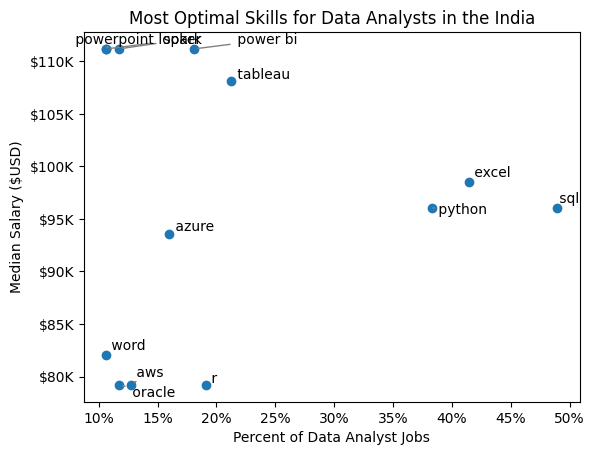

In [30]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skills_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the India')

from matplotlib.ticker import PercentFormatter

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### colouring by technology

In [31]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['word',
  'sas',
  'ssis',
  'powerbi',
  'spreadsheet',
  'dax',
  'spss',
  'qlik',
  'splunk',
  'nuix',
  'alteryx',
  'visio',
  'powerpoint',
  'microstrategy',
  'sheets',
  'power bi',
  'datarobot',
  'ms access',
  'outlook',
  'sap',
  'ssrs',
  'sharepoint',
  'tableau',
  'excel',
  'looker',
  'msaccess',
  'esquisse',
  'cognos'],
 'programming': ['go',
  'fortran',
  'c#',
  'typescript',
  'visual basic',
  'solidity',
  'sas',
  'html',
  't-sql',
  'sass',
  'ruby',
  'pascal',
  'mongodb',
  'sql',
  'matlab',
  'objective-c',
  'mongo',
  'perl',
  'erlang',
  'apl',
  'kotlin',
  'c',
  'lisp',
  'scala',
  'dart',
  'powershell',
  'lua',
  'visualbasic',
  'c++',
  'java',
  'groovy',
  'python',
  'cobol',
  'elixir',
  'golang',
  'clojure',
  'rust',
  'f#',
  'php',
  'bash',
  'swift',
  'assembly',
  'javascript',
  'no-sql',
  'css',
  'vb.net',
  'shell',
  'julia',
  'vba',
  'crystal',
  'r',
  'ocaml',
  'nosql',
  'delphi',
  'hask

In [32]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,word
0,analyst_tools,sas
0,analyst_tools,ssis
0,analyst_tools,powerbi
0,analyst_tools,spreadsheet
...,...,...
9,sync,symphony
9,sync,zoom
9,sync,webex
9,sync,rocketchat


In [36]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skills_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
80,1,79200.0,1.063830,sync,unify
81,1,105650.0,1.063830,other,unreal
82,1,119250.0,1.063830,analyst_tools,visio
83,1,79200.0,1.063830,os,windows


In [39]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skills_percent'] > 10]

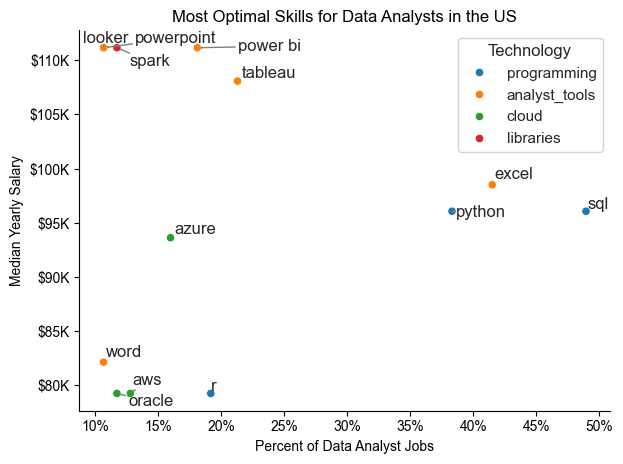

In [42]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skills_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()